<a href="https://colab.research.google.com/github/8ctal/IA_Course_Talento_Tech/blob/main/MISION_3_FUTMATCHES_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MISION 3**

*INTEGRANTES*


*   Juan Camilo Jaimes Ávila
*   Gabriel Nuñez Rueda
*   Julio cesar diaz uribe
*   Andres Felipe Puentes Carreño


---


**DATA ANALITICS FROM A EUROPEAN LEAGUE FUTBOL MATCHES**

# Libraries, packages or files to use

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import glob
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from scipy import stats
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download latest version
dataset_dir = kagglehub.dataset_download("davidcariboo/player-scores")

# Find all CSV files within the downloaded directory
csv_files = glob.glob(os.path.join(dataset_dir, "*.csv"))

# Print the list of CSV files
print(csv_files)

#Now you can loop and read in each file into a pandas DataFrame:

all_dfs = []  #To store the dataframes

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    all_dfs.append(df)

['/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/competitions.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/transfers.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/clubs.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/players.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/games.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/club_games.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/game_lineups.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/appearances.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/game_events.csv', '/root/.cache/kagglehub/datasets/davidcariboo/player-scores/versions/533/player_valuations.csv']


# Data preparation case 1

In [ ]:
all_dfs[3].info()
all_dfs[4].info()
all_dfs[7].info()
all_dfs[4].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32418 entries, 0 to 32417
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32418 non-null  int64  
 1   first_name                            30358 non-null  object 
 2   last_name                             32418 non-null  object 
 3   name                                  32418 non-null  object 
 4   last_season                           32418 non-null  int64  
 5   current_club_id                       32418 non-null  int64  
 6   player_code                           32418 non-null  object 
 7   country_of_birth                      29626 non-null  object 
 8   city_of_birth                         29966 non-null  object 
 9   country_of_citizenship                32038 non-null  object 
 10  date_of_birth                         32371 non-null  object 
 11  sub_position   

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,...,Veltins-Arena,61973.0,Manuel Gräfe,https://www.transfermarkt.co.uk/fc-schalke-04_...,4-2-3-1,4-2-3-1,FC Schalke 04,Hamburger SV,3:3,domestic_league
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,...,EINTRACHT-Stadion,23000.0,Deniz Aytekin,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-3-1-2,Eintracht Braunschweig,Sportverein Werder Bremen von 1899,0:1,domestic_league
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,...,SIGNAL IDUNA PARK,80645.0,Tobias Welz,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,3-5-2,Borussia Dortmund,Hamburger SV,6:2,domestic_league


1 ) We replace null values, group datasets and standardize values

In [ ]:
# Load the dataset
appearances = all_dfs[7]
players = all_dfs[3]

# Summarize player performance (sum or average)
player_performance = appearances.groupby('player_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    'yellow_cards': 'sum'
}).reset_index()

# Merge player performance with market value (from players dataset)
player_performance = pd.merge(player_performance, players[['player_id', 'market_value_in_eur']], on='player_id', how='left')

# Handling missing values
player_performance.fillna(0, inplace=True)

# Standardize the performance data
scaler = StandardScaler()
performance_scaled = scaler.fit_transform(player_performance[['goals', 'assists', 'yellow_cards', 'market_value_in_eur']])


2 ) Applying K - Means

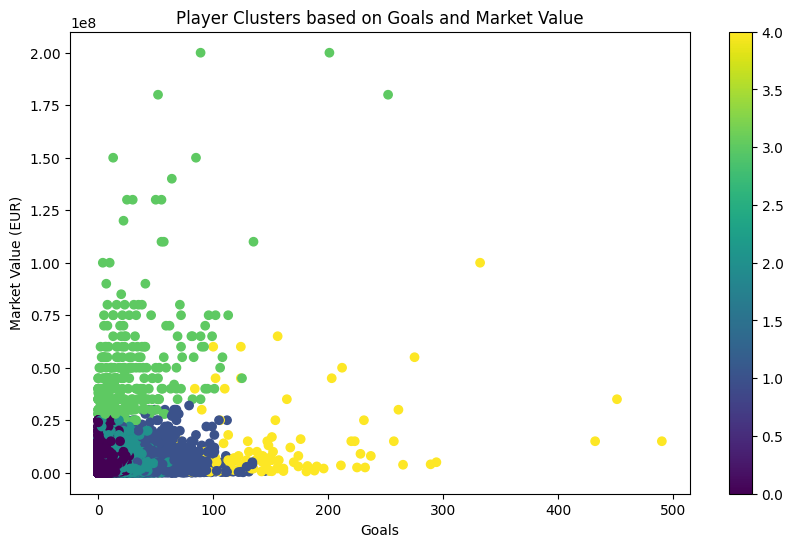

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
player_performance['Cluster'] = kmeans.fit_predict(performance_scaled)

# Visualize the clusters (Goals vs Market Value)
plt.figure(figsize=(10, 6))
plt.scatter(player_performance['goals'], player_performance['market_value_in_eur'], c=player_performance['Cluster'], cmap='viridis')
plt.title('Player Clusters based on Goals and Market Value')
plt.xlabel('Goals')
plt.ylabel('Market Value (EUR)')
plt.colorbar()
plt.show()

3 ) Using PCA for dimension reduction and visualization of clusters

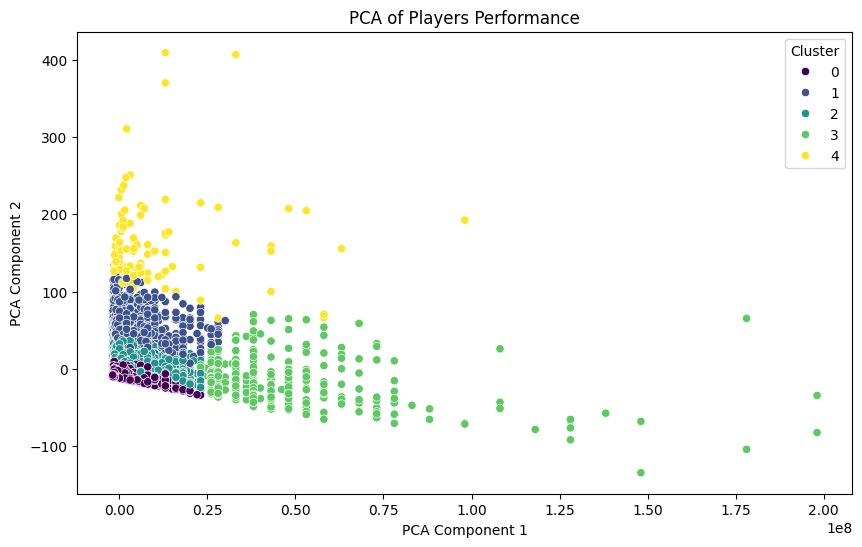

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(player_performance[['goals', 'assists', 'yellow_cards', 'market_value_in_eur']])

# Visualize PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=player_performance['Cluster'], palette='viridis')
plt.title('PCA of Players Performance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

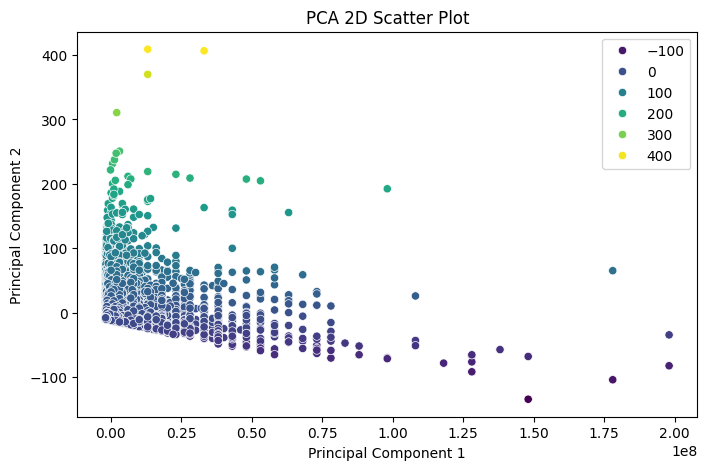

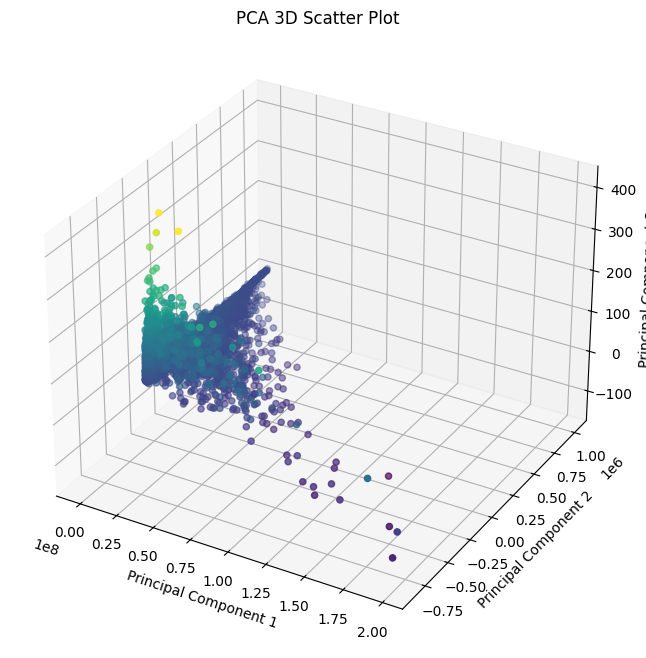

In [ ]:

# PCA 2D Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=pca_result[:, 1], palette='viridis')  # Use y for color (targets, if you have them)
plt.title('PCA 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#  PCA 3D Scatter Plot (optional)

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(player_performance)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=pca_result[:, 1], cmap='viridis')
ax.set_title('PCA 3D Scatter Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

4 ) Correlation matrix between variables {goals,asssits, yellow cards & value in market}

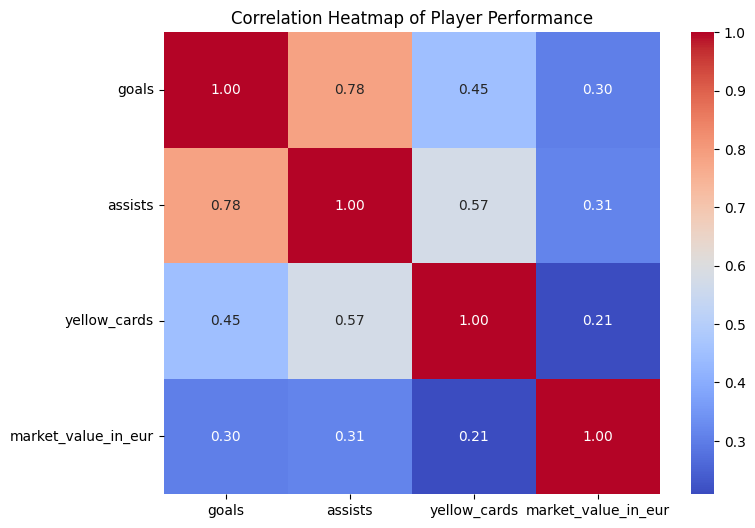

In [ ]:
# Compute the correlation matrix on aggregated player data
correlation = player_performance[['goals', 'assists', 'yellow_cards', 'market_value_in_eur']].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Player Performance')
plt.show()

# Data analysis case 1


1) Define the models to use, features, independant variables and dependant



In [ ]:
# Feature selection
features = [
    'home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals',
    'attendance', 'competition_type', 'stadium'
]

In [ ]:
models = {
    'rf_model' : RandomForestClassifier(n_estimators=100, random_state=42),
    'logreg_model' : LogisticRegression(max_iter=1000, random_state=42),
    'svc_model' : SVC(random_state=42)
}

In [ ]:
# Merge players and games data for prediction (e.g., Home team vs Away team match result prediction)
games = all_dfs[4]

# Create match outcome based on home and away goals
games['match_outcome'] = 0  # Default to away team win
games.loc[games['home_club_goals'] > games['away_club_goals'], 'match_outcome'] = 1  # Home team win
games.loc[games['home_club_goals'] == games['away_club_goals'], 'match_outcome'] = 2  # Draw


# Preprocessing: Handle categorical columns
label_encoders = {}
for column in ['stadium', 'competition_type']:
    le = LabelEncoder()
    games[column] = le.fit_transform(games[column].astype(str))  # Convert to string to handle missing or different formats
    label_encoders[column] = le

# Prepare the feature matrix (X) and target vector (y)
X = games[features]
y = games['match_outcome']


2 ) Standarize and replace null values

In [ ]:
# Impute missing values using the median (for numerical data)
imputer = SimpleImputer(strategy='median')
X[['home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals', 'attendance']] = imputer.fit_transform(
    X[['home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals', 'attendance']]
)

# Standardize numerical features (optional, but can improve model performance)
scaler = StandardScaler()
X[['home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals', 'attendance']] = scaler.fit_transform(
    X[['home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals', 'attendance']]
)

3 ) Split dataset

In [ ]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4 ) Train and fit the models

In [ ]:
y_pred = {}
for Model_name, model in models.items():
    print(f"Training {Model_name}...")
    model.fit(X_train, y_train)
    y_pred[Model_name] = model.predict(X_test)

# # Train the models
# rf_model.fit(X_train, y_train)
# logreg_model.fit(X_train, y_train)
# svc_model.fit(X_train, y_train)

# # Predict with the models
# rf_pred = rf_model.predict(X_test)
# logreg_pred = logreg_model.predict(X_test)
# svc_pred = svc_model.predict(X_test)

# Evaluate accuracy of each model
rf_accuracy = accuracy_score(y_test, y_pred['rf_model'])
logreg_accuracy = accuracy_score(y_test, y_pred['logreg_model'])
svc_accuracy = accuracy_score(y_test, y_pred['svc_model'])

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"SVC Accuracy: {svc_accuracy:.4f}")

Training rf_model...
Training logreg_model...
Training svc_model...
Random Forest Accuracy: 0.9995
Logistic Regression Accuracy: 0.9998
SVC Accuracy: 0.4541


# Metrics case 1

In [ ]:
# Model Comparison
accuracies = {
    'Random Forest': rf_accuracy,
    'Logistic Regression': logreg_accuracy,
    'SVC': svc_accuracy
}

X_test shape: (14408, 7)
y_test shape: (14408,)

Sample X_test:
        home_club_position  away_club_position  home_club_goals  \
57299           -1.627724            0.604771         2.369506   
50450           -0.042684            2.407598         0.975517   
22255           -0.042684           -0.071289        -1.115466   
4665            -0.721987            1.731538        -1.115466   
60592           -0.495552            1.055478         0.278523   

       away_club_goals  attendance  competition_type  stadium  
57299        -0.969822    1.801620                 1     1969  
50450        -0.241788    0.227140                 1       76  
22255        -0.969822   -0.665729                 2     1669  
4665         -0.969822   -0.869094                 1      663  
60592        -0.241788    0.371666                 1      388  

Sample y_test:
 57299    1
50450    1
22255    2
4665     2
60592    1
Name: match_outcome, dtype: int64


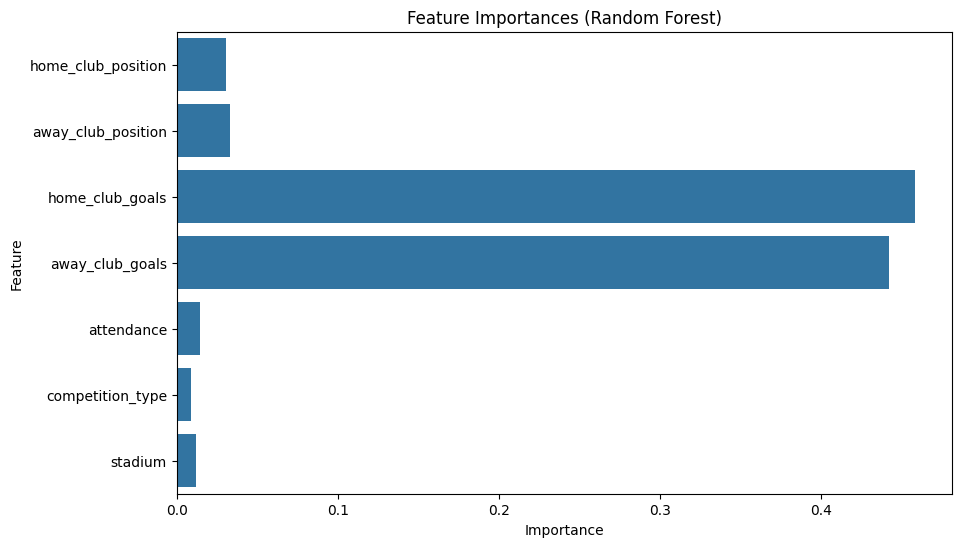

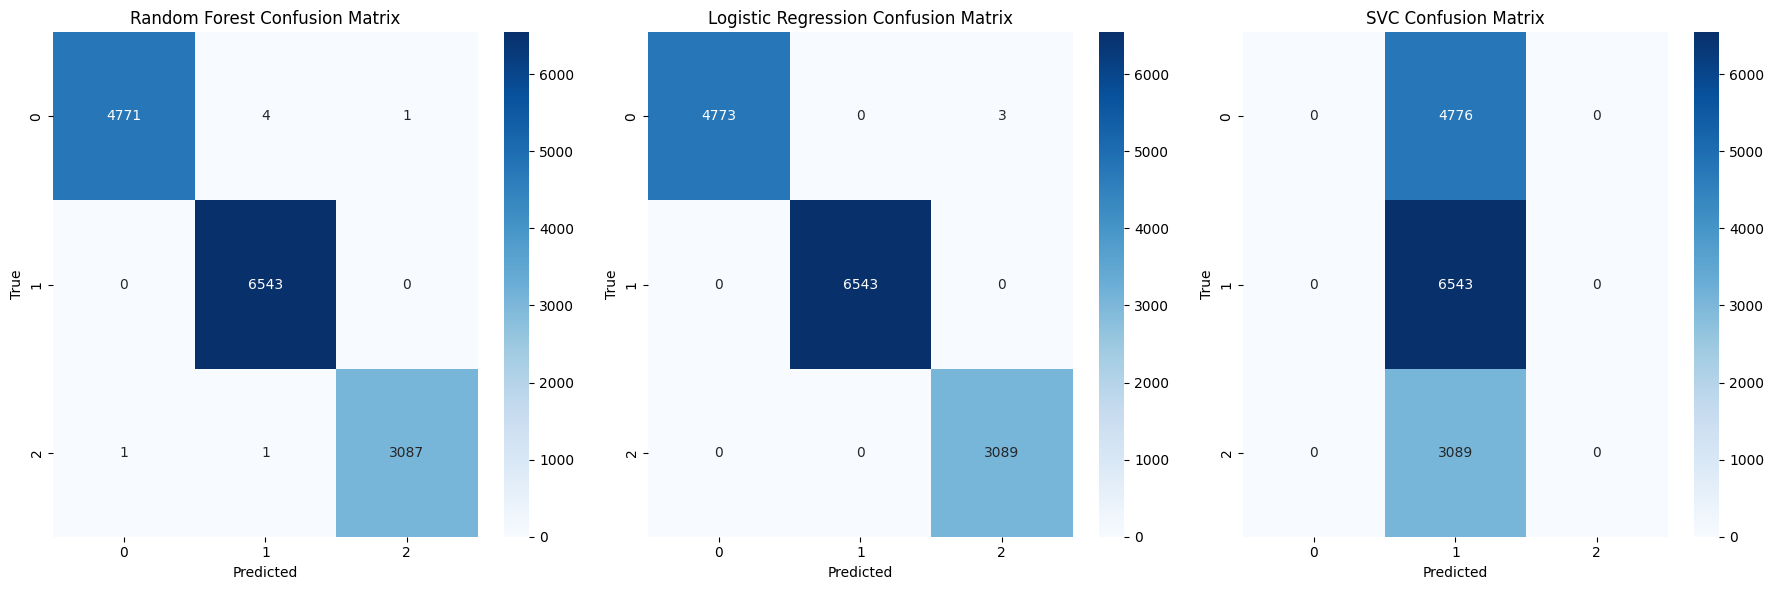

<Figure size 1000x600 with 0 Axes>

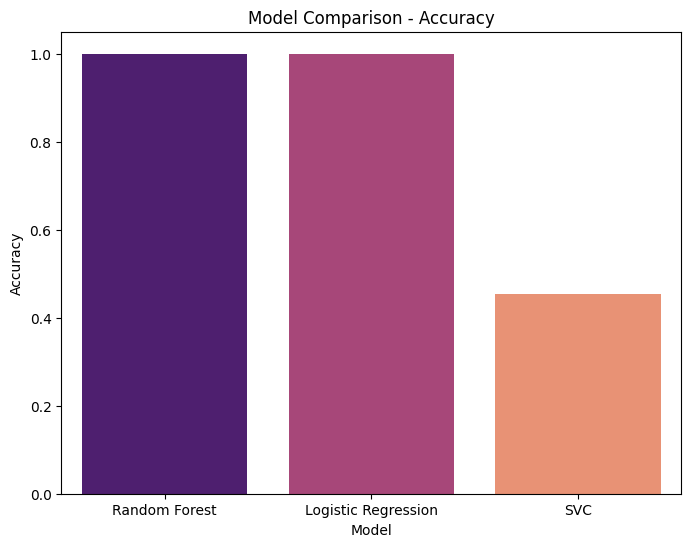

In [ ]:
# Display the X_test and y_test shapes and sample data
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\nSample X_test:\n", X_test.head())
print("\nSample y_test:\n", y_test.head())

# Visualizing Feature Importance (for Random Forest)
rf_feature_importances = models['rf_model'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test,y_pred['rf_model'])
logreg_conf_matrix = confusion_matrix(y_test, y_pred['logreg_model'])
svc_conf_matrix = confusion_matrix(y_test,y_pred['svc_model'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Logistic Regression
sns.heatmap(logreg_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# SVC
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title('SVC Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

# Plot predictions vs actual outcomes
plt.figure(figsize=(10, 6))

# Get some random samples
sample_indices = np.random.choice(range(len(y_test)), size=10, replace=False)
sample_y_test = y_test.iloc[sample_indices]
sample_rf_pred = y_pred['rf_model'][sample_indices]
sample_logreg_pred = y_pred['logreg_model'][sample_indices]
sample_svc_pred = y_test,y_pred['svc_model'][sample_indices]


plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette='magma')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Data preparation case 2

In [ ]:
#Define datasets
appearances = all_dfs[7]
players = all_dfs[3]
games = all_dfs[4]

1) Merge all in one dataset `full_players_info`





In [ ]:
# Merge appearances,players, and games dataframes
full_players_info = players.merge(appearances, on='player_id')
full_players_info = full_players_info.merge(games[['game_id','season']], on='game_id') # Combining games dataframe but we only took the season columns from it (those are the only information we needed)

# Since our focus mainly on market value of the players, we will sort the dataframe for players with highest market value first go get better sense of it
full_players_info = full_players_info.sort_values(by='market_value_in_eur', ascending=False)

# See the columns information
full_players_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1656172 entries, 1444280 to 1656150
Data columns (total 36 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   player_id                             1656172 non-null  int64  
 1   first_name                            1527019 non-null  object 
 2   last_name                             1656172 non-null  object 
 3   name                                  1656172 non-null  object 
 4   last_season                           1656172 non-null  int64  
 5   current_club_id                       1656172 non-null  int64  
 6   player_code                           1656172 non-null  object 
 7   country_of_birth                      1610542 non-null  object 
 8   city_of_birth                         1633288 non-null  object 
 9   country_of_citizenship                1633284 non-null  object 
 10  date_of_birth                         1655264 non-nul

2 ) Cleaning and preprocesing dataset

In [ ]:
# There are irrelevant column because it's not our main focus for analysis, these redundant columns will be dropped
columns_to_drop = ['highest_market_value_in_eur','country_of_birth','last_season','contract_expiration_date','player_name',
                    'agent_name' ,'appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'competition_id',
                    'first_name', 'last_name', 'current_club_id', 'player_code', 'city_of_birth', 'sub_position', 'image_url', 'url', 'date']

# Dropping those columns
full_players_info = full_players_info.drop(columns=columns_to_drop)

3) Column `market_value_in_eur` giving information about the "current" market value of the players. Only focus the data of the player's latest season, which is season **23/24**. Here in our data, the latest season is written as `season = 2023 `so we will filter it by that value.

In [ ]:
# Filter rows for players data on season 23/24
full_players_info_2023 = full_players_info.loc[full_players_info['season'] == 2023]

# Drop the 'season' column because we doesn't need it anymore (we already extracted the information needed)
full_players_info_2023 = full_players_info_2023.drop('season', axis=1)

4) Each row in our dataframes shows about the ***performance*** of the players for each appearances ***in season 23/24***. For each row, we will show the player data for each row in season 23/24 (each row will be representing each **player** instead of each **appearances**).

In [ ]:
# Group by player name and sum the relevant columns (we want to count the total statistics for season 23/24 for each players)
player_stats_2023 = full_players_info_2023.groupby('name').agg({
    'yellow_cards': 'sum', # Count the total yellow_cards that player received in season 23/24
    'red_cards': 'sum', # Count the total red_cards that player received in season 23/24
    'goals': 'sum', # Do the same process as above
    'assists': 'sum', # Do the same process as above
    'minutes_played': 'sum' # Do the same process as above
})

# Reset the index to make 'name' a regular column
player_stats_2023 = player_stats_2023.reset_index()

# Display player_stats_2023 dataframe
player_stats_2023

,name,yellow_cards,red_cards,goals,assists,minutes_played
0,Aaron Appindangoyé,1,0,1,2,2688
1,Aaron Brown,0,0,0,0,1
2,Aaron Cresswell,3,0,1,0,928
3,Aaron Donnelly,2,0,0,2,1356
4,Aaron Hickey,5,0,0,0,720
...,...,...,...,...,...,...
7077,İsmail Çokçalış,0,0,0,1,1077
7078,İzzet Topatar,1,0,0,0,39
7079,İzzet Çelik,0,0,0,0,44
7080,Şamil Öztürk,0,0,0,0,1


5 ) We then will combine those columns into our central `dataframe`

In [ ]:
full_players_info_2023.drop(columns=['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'], inplace=True)

# Merge between player total stats
full_players_info_2023 = full_players_info_2023.merge(player_stats_2023, how='left', on='name')
full_players_info_2023.head(10)

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
1,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
2,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
3,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
4,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
5,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
6,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
7,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
8,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
9,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745


6) Drop duplicate values

In [ ]:
# Print how many duplicate values we have
print("Number of duplicate values :",full_players_info_2023.duplicated().sum())

Number of duplicate values : 135427


In [ ]:
# Drop the duplicates columns again because we merged between dataframes
full_players_info_2023 = full_players_info_2023.drop_duplicates()

7) Drop null values

In [ ]:
# Print how many null values we have
full_players_info_2023.isnull().sum()

,0
name,0
country_of_citizenship,0
date_of_birth,1
position,0
foot,194
height_in_cm,209
current_club_domestic_competition_id,0
current_club_name,0
market_value_in_eur,132
yellow_cards,0


In [ ]:
# Drop the null values
full_players_info_2023 = full_players_info_2023.dropna()

# Drop certain missing values (turns out position also has missing values from raw data with the value "Missing")
full_players_info_2023 = full_players_info_2023.loc[full_players_info_2023["position"] != "Missing"]

In [ ]:
# Reset the dataframe index to make it more managable
full_players_info_2023 = full_players_info_2023.reset_index()
full_players_info_2023 = full_players_info_2023.drop(columns='index')
# Display the dataframe
full_players_info_2023.head(10)

,name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,market_value_in_eur,yellow_cards,red_cards,goals,assists,minutes_played
0,Erling Haaland,Norway,2000-07-21 00:00:00,Attack,left,195.0,GB1,Manchester City Football Club,200000000.0,1,0,38,5,3745
1,Vinicius Junior,Brazil,2000-07-12 00:00:00,Attack,right,176.0,ES1,Real Madrid Club de Fútbol,200000000.0,11,0,24,11,3084
2,Jude Bellingham,England,2003-06-29 00:00:00,Midfield,right,186.0,ES1,Real Madrid Club de Fútbol,180000000.0,9,1,23,13,3644
3,Kylian Mbappé,France,1998-12-20 00:00:00,Attack,right,178.0,ES1,Real Madrid Club de Fútbol,180000000.0,5,0,36,7,3329
4,Phil Foden,England,2000-05-28 00:00:00,Attack,left,171.0,GB1,Manchester City Football Club,150000000.0,3,0,27,12,4259
5,Lamine Yamal,Spain,2007-07-13 00:00:00,Attack,left,180.0,ES1,Futbol Club Barcelona,150000000.0,6,0,7,9,2957
6,Bukayo Saka,England,2001-09-05 00:00:00,Attack,left,178.0,GB1,Arsenal Football Club,140000000.0,4,0,20,14,3841
7,Florian Wirtz,Germany,2003-05-03 00:00:00,Midfield,right,177.0,L1,Bayer 04 Leverkusen Fußball,130000000.0,7,0,18,20,3475
8,Rodri,Spain,1996-06-22 00:00:00,Midfield,right,191.0,GB1,Manchester City Football Club,130000000.0,10,1,9,14,4327
9,Federico Valverde,Uruguay,1998-07-22 00:00:00,Midfield,right,182.0,ES1,Real Madrid Club de Fútbol,130000000.0,2,0,3,8,4280


8 ) Correcting data types and encoding

In [ ]:
# Transform date_of_birth into datetime format
full_players_info_2023['date_of_birth'] = pd.to_datetime(full_players_info_2023['date_of_birth'])

In [ ]:
# Get the current datetime
now = datetime.now()

# Calculate age in years
full_players_info_2023['age'] = (now - full_players_info_2023['date_of_birth']).dt.days / 365.25
full_players_info_2023['age'] = full_players_info_2023['age'].round().astype(int)

# Drop the 'date_of_birth' column because we already transformed it into age
full_players_info_2023 = full_players_info_2023.drop(columns=['date_of_birth'])

In [ ]:
full_players_info_2023.columns

Index(['name', 'country_of_citizenship', 'position', 'foot', 'height_in_cm',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'age'],
      dtype='object')

In [ ]:
full_players_info_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name                                  6747 non-null   object 
 1   country_of_citizenship                6747 non-null   object 
 2   position                              6747 non-null   object 
 3   foot                                  6747 non-null   object 
 4   height_in_cm                          6747 non-null   float64
 5   current_club_domestic_competition_id  6747 non-null   object 
 6   current_club_name                     6747 non-null   object 
 7   market_value_in_eur                   6747 non-null   float64
 8   yellow_cards                          6747 non-null   int64  
 9   red_cards                             6747 non-null   int64  
 10  goals                                 6747 non-null   int64  
 11  assists          

# Data analysis case 2

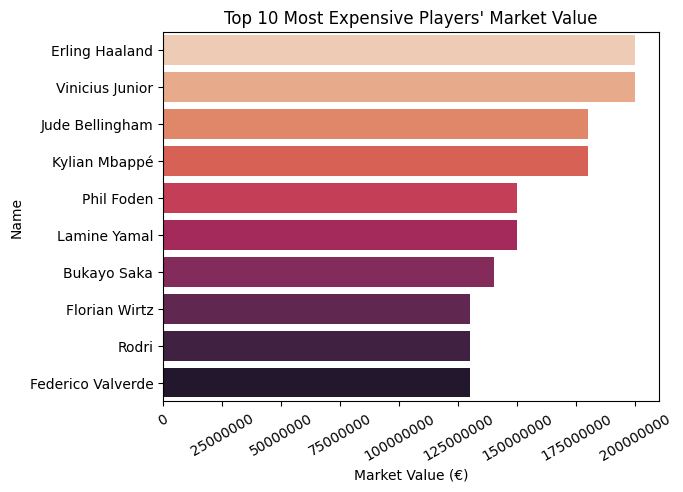

In [ ]:
# Filter the DataFrame, sort it by 'market_value_in_eur', and select the top 10 players
sns.barplot(data=full_players_info_2023.sort_values(by='market_value_in_eur', ascending=False).head(10), x='market_value_in_eur', y='name', edgecolor="none",palette='rocket_r')

# Define the format function
def format_func(value, tick_number):
    return f'{value:.0f}'

# Plot the data
pvl = plt.gca()

# Apply the format to x-axis
pvl.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Set the label and titles
plt.xlabel('Market Value (€)')
plt.xticks(rotation=30)
plt.ylabel('Name')
plt.title("Top 10 Most Expensive Players' Market Value")

# Show the plot
plt.show()

Create a copy of `full_players_info_2023` into `df` variable

In [ ]:
# Create a temporary copy of the DataFrame to avoid modifying the original
df_copy = full_players_info_2023.copy()

# Define height bins and labels
bins_height = [150, 170, 180, 190, 210]
labels_height = ['150-170', '170-180', '180-190', '190-210']

# Create height categories in the copy of the DataFrame
df_copy['height_category'] = pd.cut(df_copy['height_in_cm'], bins=bins_height, labels=labels_height)



In [ ]:
# Get medians for each height category
medians = df_copy.groupby('height_category')['market_value_in_eur'].median()

# Print the medians with labels
for category, median in zip(labels_height, medians):
  print(f"Median Market Value for {category} cm: {median:.2f} Million €")

Median Market Value for 150-170 cm: 1500000.00 Million €
Median Market Value for 170-180 cm: 1300000.00 Million €
Median Market Value for 180-190 cm: 1500000.00 Million €
Median Market Value for 190-210 cm: 1200000.00 Million €


**Market Value vs Age**

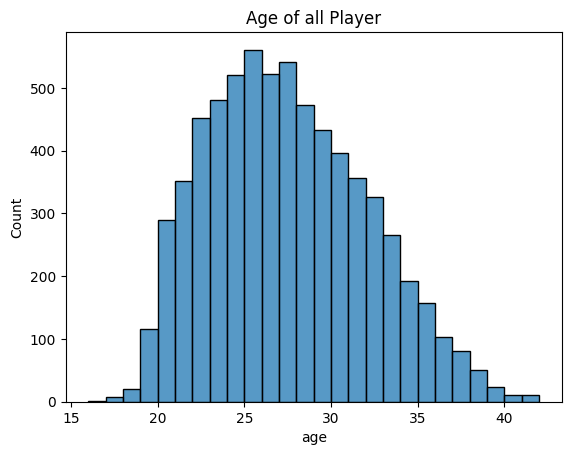

Mean player age :  26.988291092337334
Median player age :  27.0


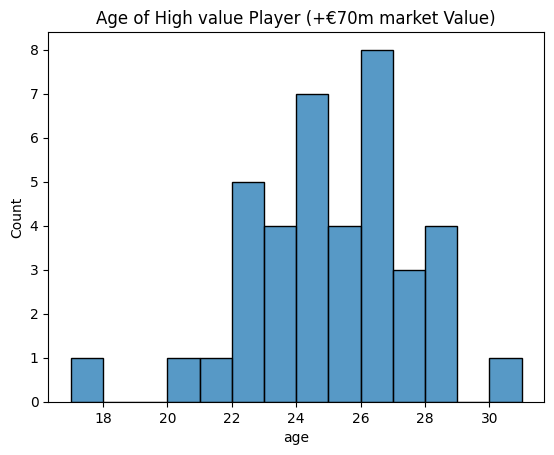

Mean player age (High value) :  24.615384615384617
Median player age (High value) :  25.0


In [ ]:
# Histogram plot: Market Value vs Age
plt.title("Age of all Player")
sns.histplot(x='age',data=full_players_info_2023, binwidth=1,palette='rocket_r')
plt.show()

print("Mean player age : ", full_players_info_2023['age'].mean())
print("Median player age : ", full_players_info_2023['age'].median())

High_value_full_players_info_2023 = full_players_info_2023[full_players_info_2023['market_value_in_eur']>70000000]
plt.title("Age of High value Player (+€70m market Value)")
sns.histplot(x='age',data=High_value_full_players_info_2023, binwidth=1,palette="viridis")
plt.show()

print("Mean player age (High value) : ", High_value_full_players_info_2023['age'].mean())
print("Median player age (High value) : ", High_value_full_players_info_2023['age'].median())

**Correlation matrix**

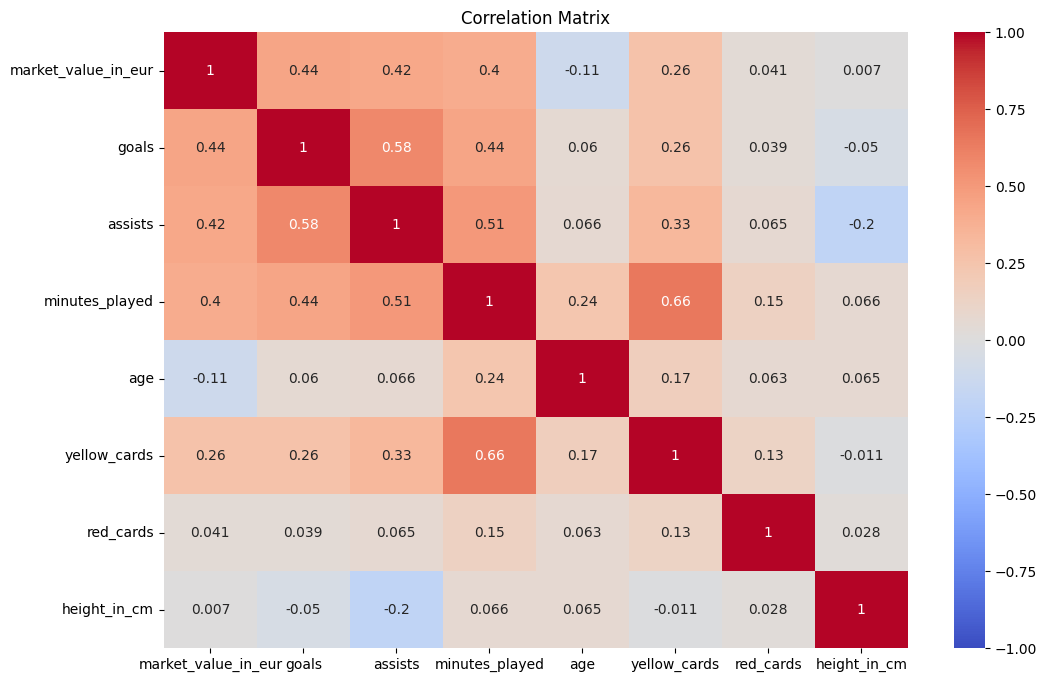

In [ ]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = full_players_info_2023[['market_value_in_eur', 'goals', 'assists', 'minutes_played', 'age', 'yellow_cards', 'red_cards', 'height_in_cm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

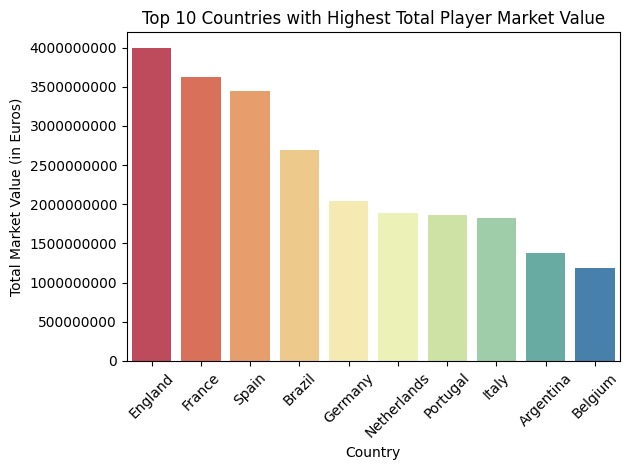

In [ ]:
# Group by country and calculate the sum of market values
country_market_value = full_players_info_2023.groupby('country_of_citizenship')['market_value_in_eur'].sum().sort_values(ascending=False)

# Select top 10 countries
top_10_countries = country_market_value.head(10)

# Create a bar chart with seaborn
sns.barplot(x=top_10_countries.index, y=top_10_countries.values,palette='Spectral')

# Define the format function to display integer market values (no decimals)
def format_func(value, tick_number):
    return f'{value:.0f}'

# Get the current axis object
ax = plt.gca()

# Apply the format function to the y-axis (total market value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Customize the plot with labels and title
plt.xlabel('Country')
plt.ylabel('Total Market Value (in Euros)')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest Total Player Market Value')
plt.tight_layout()  # Adjust spacing between elements for better readability

# Show the plot
plt.show()

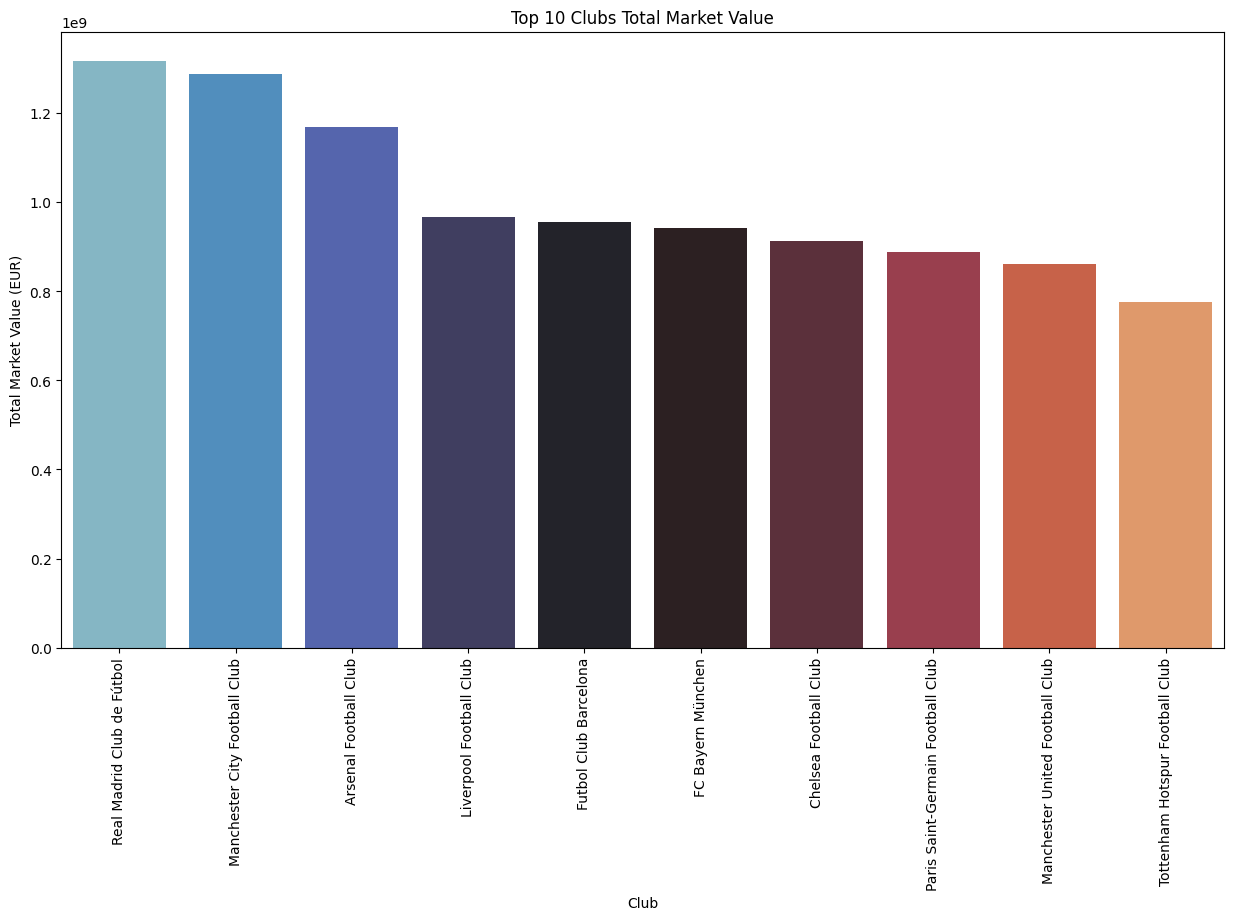

In [ ]:
plt.figure(figsize=(15, 8))
club_value = full_players_info_2023.groupby('current_club_name')['market_value_in_eur'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=club_value.index, y=club_value.values,palette='icefire')
plt.xlabel('Club')
plt.title('Top 10 Clubs Total Market Value')
plt.xlabel('Club')
plt.ylabel('Total Market Value (EUR)')
plt.xticks(rotation=90)
plt.show()

**Market Value vs Goals** ` Outliers`

<Figure size 1000x600 with 0 Axes>

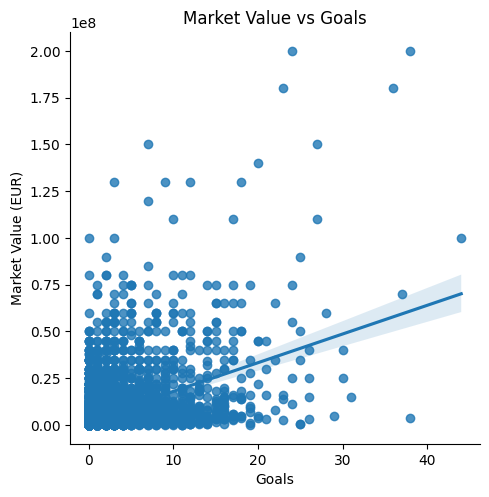

In [ ]:
# Scatter plot: Market Value vs Goals
plt.figure(figsize=(10, 6))
sns.lmplot(x='goals', y='market_value_in_eur', data=full_players_info_2023)
plt.title('Market Value vs Goals')
plt.xlabel('Goals')
plt.ylabel('Market Value (EUR)')
plt.show()


# Prediction model `(Regression Forest)` with case 2

name                                     object
country_of_citizenship                    int64
position                                  int64
foot                                      int64
height_in_cm                            float64
current_club_domestic_competition_id      int64
current_club_name                         int64
market_value_in_eur                     float64
yellow_cards                              int64
red_cards                                 int64
goals                                     int64
assists                                   int64
minutes_played                            int64
age                                       int64
dtype: object
country_of_citizenship                    int64
position                                  int64
foot                                      int64
height_in_cm                            float64
current_club_domestic_competition_id      int64
current_club_name                         int64
yellow_cards              

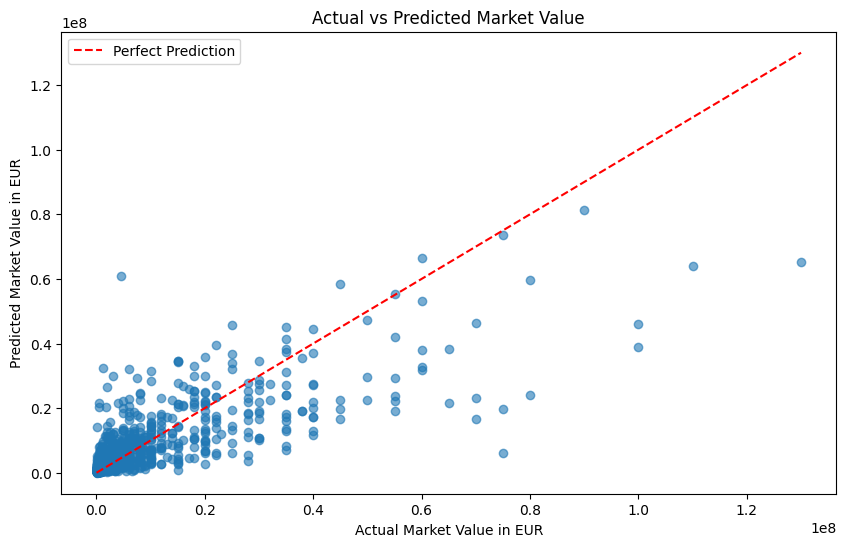

                                 Feature  Importance
10                        minutes_played    0.246304
8                                  goals    0.152470
11                                   age    0.151332
4   current_club_domestic_competition_id    0.150182
9                                assists    0.087498
5                      current_club_name    0.065189
0                 country_of_citizenship    0.043465
6                           yellow_cards    0.043126
3                           height_in_cm    0.036000
1                               position    0.010669
2                                   foot    0.009794
7                              red_cards    0.003972


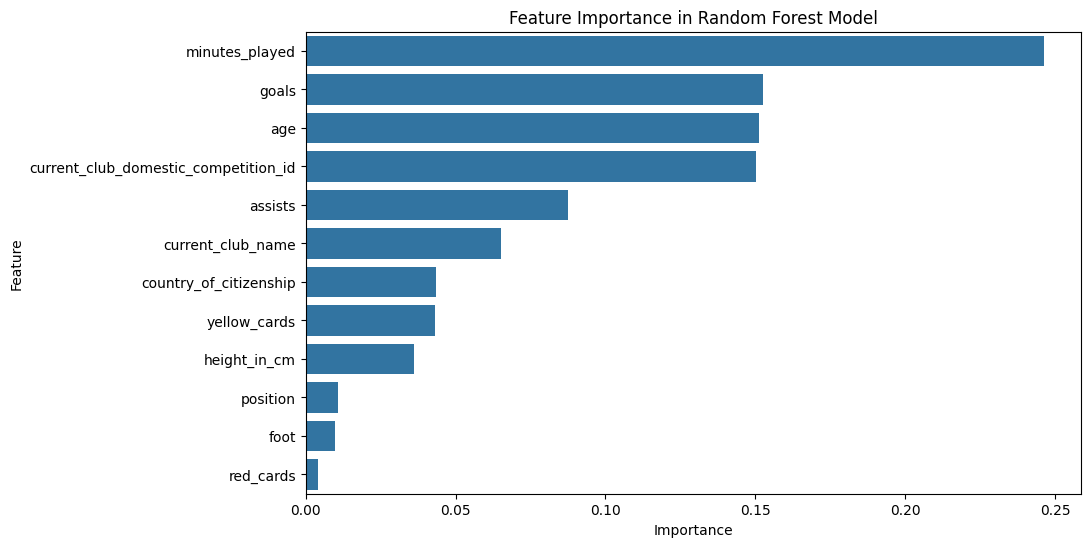

In [ ]:
df = full_players_info_2023.copy()

# List of categorical columns to encode
categorical_columns = ['country_of_citizenship', 'position', 'foot', 'current_club_name']
categorical_columns.append('current_club_domestic_competition_id')

# Encode categorical columns (Label Encoding for simplicity)
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Check the data types after encoding
print(df.dtypes)

# Define features (X) and target (y)
X = df.drop(['name', 'market_value_in_eur'], axis=1)  # Drop the name and target variable
y = df['market_value_in_eur']

# Check if all columns in X are numeric (print the data types of each column)
print(X.dtypes)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check for non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print(f'Non-numeric columns in X_train: {non_numeric_columns}')

# Check for non-numeric columns in X_test
non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns
print(f'Non-numeric columns in X_test: {non_numeric_columns_test}')


# Standardize the data (important for many models, including Random Forest)
scaler = StandardScaler()

# Ensure all features are numeric before applying the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)  # Only transform the test set

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Visualizing the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.title("Actual vs Predicted Market Value")
plt.xlabel("Actual Market Value in EUR")
plt.ylabel("Predicted Market Value in EUR")
plt.legend()
plt.show()

# Feature Importance (which features are contributing the most to predictions)
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

# TESTING

In [ ]:
def predict_market_value(player_name, df=full_players_info_2023.copy()):
  """
  Predicts the market value of a football player for the next year using a Random Forest model.

  Args:
      player_name (str): Name of the player for whom you want to predict market value.
      df (pandas.DataFrame, optional): DataFrame containing player information. Defaults to full_players_info_2023.copy().

  Returns:
      float: Predicted market value of the player for the next year.
      str (optional): Error message if player not found.

  Raises:
      ValueError: If player is not found in the DataFrame.
  """

  # Data Preprocessing
  categorical_columns = ['country_of_citizenship', 'position', 'foot', 'current_club_name']
  categorical_columns.append('current_club_domestic_competition_id')

  le = LabelEncoder()
  for col in categorical_columns:
      df[col] = le.fit_transform(df[col])

  X = df.drop(['name', 'market_value_in_eur'], axis=1)
  y = df['market_value_in_eur']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Player Search & Model Training
  player_row = df[df['name'] == player_name]
  if player_row.empty:
      raise ValueError(f"Player '{player_name}' not found in the data.")

  player_data = player_row.drop(['name', 'market_value_in_eur'], axis=1)
  player_data_scaled = scaler.transform(player_data)

  # Initialize and train Random Forest model
  rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_model.fit(X_train, y_train)

  # Prediction and Error Handling
  try:
      predicted_value = rf_model.predict(player_data_scaled)[0]
      return predicted_value
  except IndexError:
      # Handle potential index errors (e.g., player data might have different columns)
      return "Prediction failed. Check compatibility of player data with the model's features."

# Example Usage (assuming you have the 'full_players_info_2023' DataFrame)
try:
  predicted_value = predict_market_value(input("Enter player name: "))
  print(f"Predicted market value for {predicted_value:.2f} million EUR (next year)")
except ValueError as e:
  print(e)

Predicted market value for 142940000.00 million EUR (next year)
